In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)

y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [ ]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)

y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

100


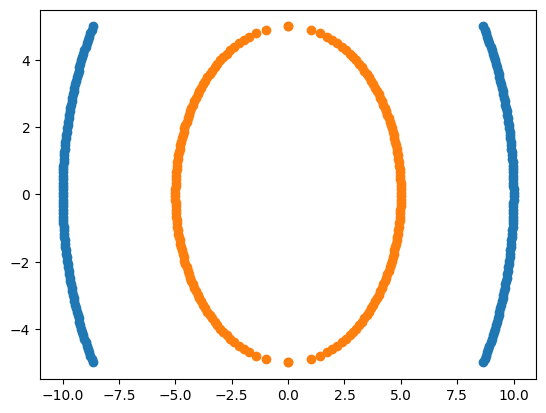

In [13]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [16]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [17]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [18]:
## Independent and Dependent Features
x = df.iloc[:, :2]
y = df['Y']

In [19]:
## Splitting the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

## Polynomial Kernel

In [20]:
## We need to find components for polynomial kernel
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [21]:
## Independent and Deendent Features
x = df.drop(columns= ['Y'])
y = df['Y']

In [22]:
## Splitting the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

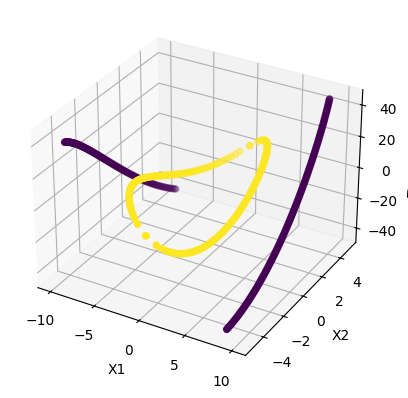

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['X1'],
    df['X2'],
    df['X1*X2'],
    c=df['Y']
)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z = X1*X2')

plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio

# Optional fallback renderer (VERY reliable)
pio.renderers.default = "browser"

# Create Z feature explicitly
df['Z'] = df['X1'] * df['X2']

# Plot
fig = px.scatter_3d(
    df,
    x='X1',
    y='X2',
    z='Z',
    color='Y'
)

fig.show()

In [32]:
fig = px.scatter_3d(
    df,
    x='X1',
    y='X2',
    z='Z',
    color='Y',
    opacity=0.7,
    title="3D Feature Interaction Plot"
)

fig.update_traces(marker=dict(size=4))
fig.show()

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [34]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0